<a href="https://colab.research.google.com/github/iagombermudez/03MIAR---Algoritmos-de-Optimizacion/blob/main/AG2/Iago_Berm%C3%BAdez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Iago Bermúdez <br>
Link:   https://colab.research.google.com/drive/1fzcXzKM0diHxW8VWYgxP2Fdn2KrIAz1I <br>
Github: https://github.com/iagombermudez/03MIAR---Algoritmos-de-Optimizacion
<br>




In [ ]:
import math
import random

random.seed(42)

## Programación Dinámica. Viaje por el rio

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

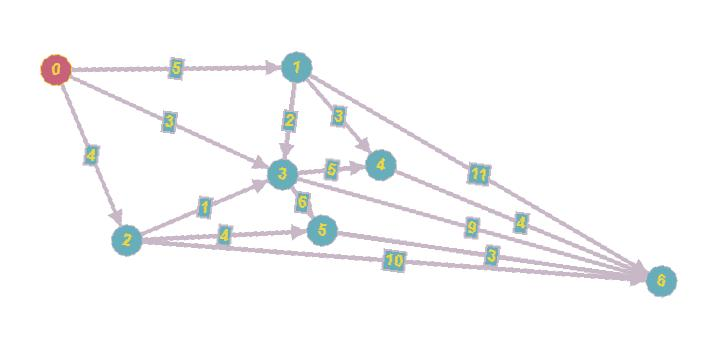

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

### Implementación propia

In [ ]:
def set_prices(tariffs):
  N = len(tariffs[0])
  prices = [[9999 for x in range(N)]for y in range(N)]
  route = [['' for x in range(N)]for y in range(N)]
  for i in range(N-1):
    for j in range(i+1, N):
      min_value = tariffs[i][j]
      route[i][j] = i
      for k in range(i, j):
        value = prices[i][k] + tariffs[k][j]
        if value < min_value:
          min_value = value
          route[i][j] = k
        prices[i][j] = min_value
  return prices, route

prices, route = set_prices(TARIFAS)

In [ ]:
def calculate_route(initial, end):
  if initial == end:
    return 'Ruta: '
  return str(calculate_route(initial, route[initial][end])) + ',' + str(route[initial][end])

calculate_route(0, 6)

'Ruta: ,0,2,5'

### Implementación en clase

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

### Implementación propia

He encontrado que en la implementación en clase el algoritmo no encuentra la solución más óptima. No he podido encontrar el motivo, pero creo que se debe a que no está comprobando correctamente si existe alguna otra solución mejor. Podemos ver como al inicio, elige asignar la primera tarea al agente '1', ya que tiene una CI menor, pero después ignora que asignando al agente '0' la tarea 1, se encontraría una solución más óptima.

En la siguiente implementación se ha conseguido encontrar la mejor solución, aunque obviamente el número de iteraciones es algo mayor, ya que vuelve hacia atrás para comprobar el resto de soluciones.

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
def get_cost(COSTES, agent, task):
  return COSTES[agent][task]

In [ ]:
import math
def get_total_min_bound(COSTES):
   return sum(min(get_cost(COSTES, agent, task) for agent in range(len(COSTES))) for task in range(len(COSTES[0])))

def get_random_upper_bound(COSTES):
  return sum(get_cost(COSTES, i, i) for i in range(len(COSTES)))

def get_bound_for_node(COSTES, node, mode='min'):
    cost = 0
    for task in range(len(COSTES[0])):
        if task in node:
            bound_cost = get_cost(COSTES, node.index(task), task)
        else:
            costs = [get_cost(COSTES, agent, task) for agent in range(len(COSTES)) if node[agent] == -1]
            bound_cost = min(costs) if mode == 'min' else max(costs, default=0)
        cost += bound_cost
    return cost

def get_ci(node, COSTES):
    return get_bound_for_node(COSTES, node, mode='min')

def get_cs(node, COSTES):
    return get_bound_for_node(COSTES, node, mode='max')

In [ ]:
def get_branches(node, new_pos, upper_bound, COSTES):
  new_nodes = []
  for i in range(len(COSTES)):
    new_node = node.copy()
    if i not in node:
      new_node[new_pos] = i
      ci = get_ci(new_node, COSTES)
      if ci <= upper_bound: # Poda
        new_nodes.append({'node': new_node, 'ci':get_ci(new_node, COSTES), 'cs': get_cs(new_node, COSTES)} )
  return new_nodes

In [ ]:
def remove_bounded_branches(branches, bound):
  return [branch for branch in branches if (branch['ci'] < bound)] # Poda

In [ ]:
def get_next_node(branches):
  return None if branches == [] else min(branches, key=lambda x: x['ci'])

In [ ]:
def solution_found(node):
  return -1 not in node['node']

In [ ]:
def task_assignation(solution, current_pos, lower_bound, upper_bound, COSTES):
  solution_tree = {'node': solution, 'ci': lower_bound, 'branches': get_branches(solution, current_pos, upper_bound, COSTES)}
  best_node_so_far = None
  while solution_tree['branches']:
    if best_node_so_far != None:
      solution_tree['branches'] = remove_bounded_branches(solution_tree['branches'], best_node_so_far['ci'])
    next_node_to_explore = get_next_node(solution_tree['branches'])
    if next_node_to_explore:
      solution_tree['branches'].remove(next_node_to_explore)
      if solution_found(next_node_to_explore):
        return next_node_to_explore
    else:
      return best_node_so_far
    best_node_so_far = task_assignation(next_node_to_explore['node'], current_pos+1, next_node_to_explore['ci'], next_node_to_explore['cs'], COSTES)
  return best_node_so_far

solution = task_assignation([-1, -1, -1, -1], 0, get_total_min_bound(COSTES), get_random_upper_bound(COSTES), COSTES)
print(solution)

{'node': [0, 2, 3, 1], 'ci': 61, 'cs': 61}


### Implementación en clase

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )
  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


### Comparación entre fuerza bruta y ramificación y poda

La siguiente función se trata de un decorador que utilizaremos para medir el tiempo que tarda en ejecutarse la función.

In [ ]:
import time
from functools import wraps
def calcular_tiempo(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} ejecutada en {execution_time:.6f} seconds.")
        return result
    return wrapper


Creamos la función para calcular la mejor solución utilizando fuerza bruta y volvemos a declarar la función de ramificación y poda para eliminar la función print y así poder observar mejor los resultados. Además, añadiremos el decorador para calcular el tiempo a ambas funciones.

In [ ]:
import itertools

@calcular_tiempo
def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s

@calcular_tiempo
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']

    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]
    NODOS.extend(HIJOS)
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

Creamos una función para generar matrices aleatorias

In [ ]:
import random
def matriz_aleatoria(n):
    matrix = []
    for _ in range(n):
        row = [random.randint(1, 50) for _ in range(n)]
        matrix.append(row)
    return matrix

#### Fuerza bruta

In [ ]:
for i in range(5, 12):
  print(f'Dimensión: {i}')
  matriz_costes = matriz_aleatoria(i)
  fuerza_bruta(matriz_costes)

Dimensión: 5
fuerza_bruta ejecutada en 0.000268 seconds.
Dimensión: 6
fuerza_bruta ejecutada en 0.001781 seconds.
Dimensión: 7
fuerza_bruta ejecutada en 0.006943 seconds.
Dimensión: 8
fuerza_bruta ejecutada en 0.229773 seconds.
Dimensión: 9
fuerza_bruta ejecutada en 0.550900 seconds.
Dimensión: 10
fuerza_bruta ejecutada en 7.346397 seconds.
Dimensión: 11
fuerza_bruta ejecutada en 79.653781 seconds.


Podemos observar como el tiempo de ejecución crece de forma exponencial y a partir de la dimensión 11 el algoritmo pasa a tardar varios segundos. Decidir en que dimensión deja de ser apropiado utilizar este algoritmo es una decisión algo abstracta, ya que dependerá de las condiciones del problema. Sin embargo, considero que a partir del minuto de ejecución, podemos considerar que el algoritmo dejará de ser apropiado. Por lo tanto, el algoritmo dejará de ser apropiado en esta dimensión, ya que en dimensiones posteriores a la dimensión 11, el algoritmo pasará rápidamente de tardar minutos a horas.

#### Ramificación y poda

In [ ]:
for i in range(5, 12):
  print(f'Dimensión: {i}')
  matriz_costes = matriz_aleatoria(i)
  ramificacion_y_poda(matriz_costes)

Dimensión: 5
ramificacion_y_poda ejecutada en 0.000929 seconds.
Dimensión: 6
ramificacion_y_poda ejecutada en 0.003627 seconds.
Dimensión: 7
ramificacion_y_poda ejecutada en 0.009446 seconds.
Dimensión: 8
ramificacion_y_poda ejecutada en 0.038007 seconds.
Dimensión: 9
ramificacion_y_poda ejecutada en 0.033801 seconds.
Dimensión: 10
ramificacion_y_poda ejecutada en 1.521210 seconds.
Dimensión: 11
ramificacion_y_poda ejecutada en 1.255530 seconds.


Podemos observar que a diferencia de en el algoritmo de fuerza bruta, los tiempos de ejecución no crecen de la misma forma. Sin embargo, los ejemplos anteriores muestran casos en los que por suerte se ha encontrado la solución al problema en uno de los primeros nodos a explorar. Dependiendo de donde se encuentre la solución, y de sí se puede podar o no el árbol de soluciones, el tiempo de ejecución puede variar drásticamente.

En el siguiente trozo de código, se muestra el tiempo de ejecución del algoritmo de ramificación y poda para la misma dimensión, pero utilizando diferentes matrices. Podemos observar como el tiempo de ejecución varía bastante entre una ejecución y otra, a pesar de que la matriz de costes tiene la misma dimensión. El tiempo de ejecución dependerá mucho de los nodos que se puedan podar. Si ninguno de los nodos se puede podar, entonces el tiempo de ejecución será similar al del algoritmo de fuerza bruta, ya que será necesario visitar todos los nodos.

In [ ]:
for i in range(10):
  matriz_costes = matriz_aleatoria(9)
  ramificacion_y_poda(matriz_costes)

ramificacion_y_poda ejecutada en 1.014728 seconds.
ramificacion_y_poda ejecutada en 3.364415 seconds.
ramificacion_y_poda ejecutada en 0.065403 seconds.
ramificacion_y_poda ejecutada en 0.231604 seconds.
ramificacion_y_poda ejecutada en 0.049604 seconds.
ramificacion_y_poda ejecutada en 1.293773 seconds.
ramificacion_y_poda ejecutada en 0.324134 seconds.
ramificacion_y_poda ejecutada en 0.030174 seconds.
ramificacion_y_poda ejecutada en 11.586039 seconds.
ramificacion_y_poda ejecutada en 0.062026 seconds.


Por lo tanto, el número de dimensiones que podemos incluir en el algoritmo de ramificación y poda puede ser mayor que en el de fuerza bruta. Sin embargo, debemos tener en cuenta que en el peor de los casos tiene la misma complejidad que el algoritmo de fuerza bruta. Si esto fuera un problema, el algoritmo de ramificación y poda dejaría de ser una buena opción en la misma dimensión que el algoritmo de fuerza bruta.

##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

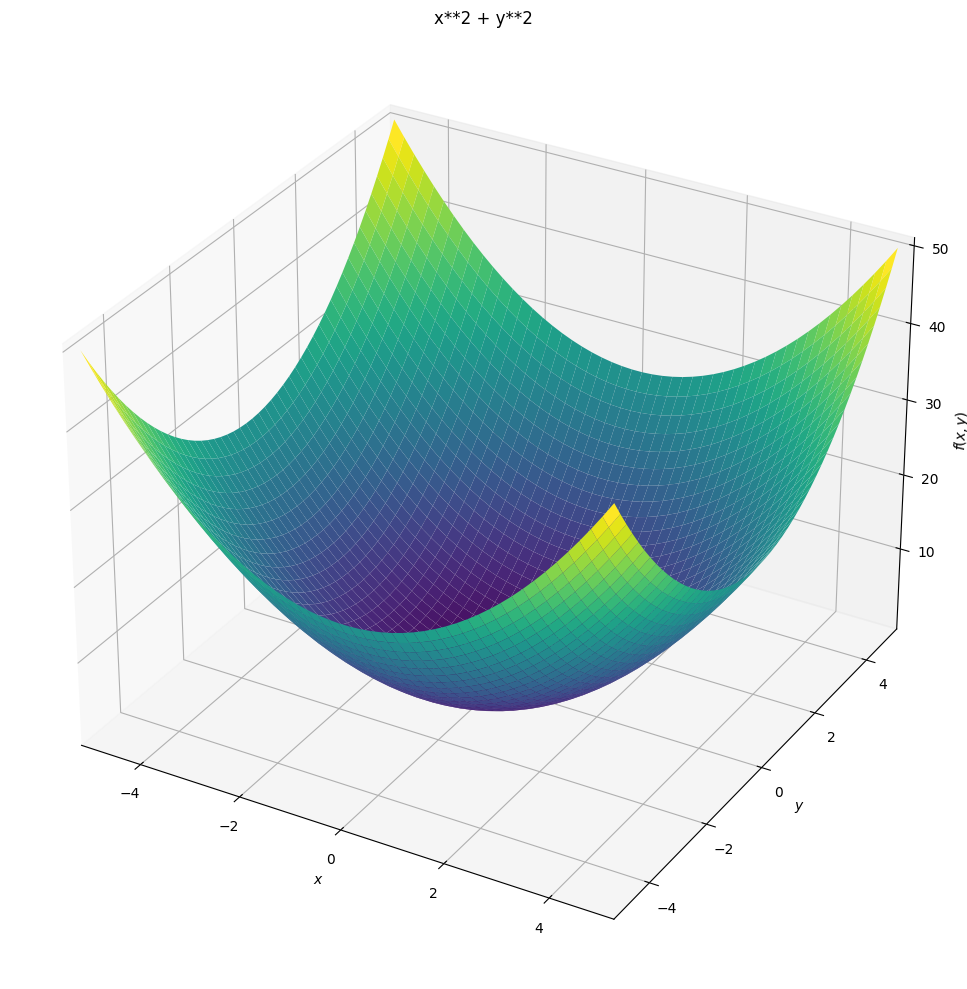

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

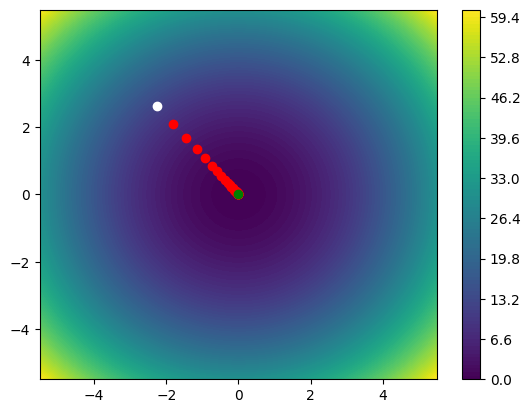

Solucion: [-3.235993145778827e-05, 3.745233790824624e-05] 2.449842778746213e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
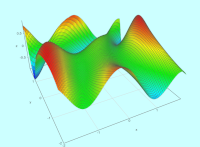


A continuación se define una función para calcular el descenso en gradiente de forma iterativa para una función de cualquier dimensión. A esta función se le pueden pasar como parámetros el ratio de aprendizaje (learning_rage) y el máximo número de iteraciones (maxit)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def gradient_descent(grad_f, x_0, learning_rate, maxit):
    theta = x_0
    points = [theta]
    try:
        for i in range(maxit):
            gradient = grad_f(theta)
            theta = theta - learning_rate*gradient
            points.append(theta)
    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")
    finally:
        return theta, points

In [ ]:
def f(X):
    return np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2*X[0] + 1 - np.exp(X[1]))

def grad_f(X):
    h = 0.01
    T = np.copy(X)
    grad = np.zeros(2)
    for it, th in enumerate(X):
      T[it] = T[it] + h
      grad[it] = (f(T) - f(X)) / h
    return grad

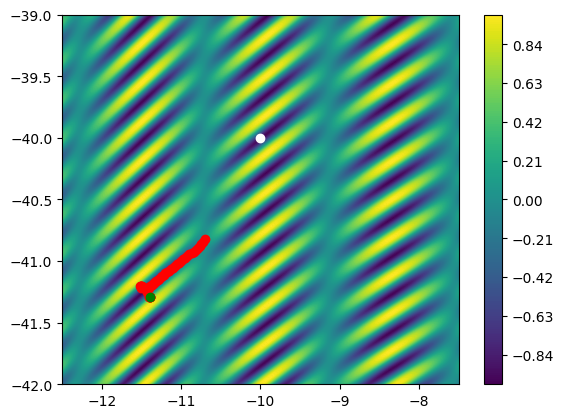

El valor [-11.39064301 -41.29008508] es un mínimo local de la función.


In [ ]:
# El valor elegido como punto inicial es el (-10, -40) para que se pueda mostrar
# corectamente el funcionamineto en el gráfico. Sin embargo, se puede probar con
# otros valores, pero debido a la naturaleza de la función, será más complejo
# verlo
result, points = gradient_descent(grad_f, np.array([-10,-40]), learning_rate=0.01, maxit=50) #Después de probar varios valores, estos parecen ser los que mejor se ajustan

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 200
X=np.linspace(-12.5,-7.5,resolucion)
Y=np.linspace(-42,-39,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

plt.plot(points[0][0],points[0][1],"o",c="white")
for i in range(1, len(points)):
  plt.plot(points[i][0],points[i][1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(points[i][0],points[i][1],"o",c="green")
plt.show()


print(f'El valor {result} es un mínimo local de la función.')